<br>

<center> <h2> Indian Statistical Institute </h2> </center>

<center> <h1> <b> Eighth Summer School on Computer Vision, Image Processing and Machine Learning </h1> </b> </center>


<center> <h3> May 31 – July 15, 2023 </h3> </center>

<br>

<hr>

<br>

<center> <h2> <b> 
<center> <h2> <b> Datasets and Dataloader </h2> <b> </center>
<center> <h2> Susmita Ghosh</h2> </center>

<center> <h4> Senior Research Fellow</h4> </center>

<center> <h4> Electronics and Communication Sciences Unit</h4> </center>

<center> <h3> 8th June, 2023 </h3> </center>


Topics to be discussed:

1. Datasets
2. Dataloader
3. Transforms
4. Train model using dataloader

Modules to learned:

1. torchvision (datasets, transform)
2. torch.utils.data.DataLoader (Dataloader)



## **Data/Dataset:** 
* Important component in the field of Machine Learning.
* Set of observations or measurements that can be used to train a machine-learning model. 
* Both quality and quantity of data available for training and testing play a significant role in determining the performance of a machine-learning model.
* Data can be in various forms --- numerical, categorical, or time-series data etc. 
* Machine learning algorithms use data to learn patterns and relationships between input variables and target outputs, which can then be used for prediction or classification tasks.

*   Data is typically divided into two types: 

> * Labeled data --- supervised learning
> * Unlabeled data --- unsupervised learning


* Labeled data includes a label or target variable that the model is trying to predict, whereas unlabeled data does not include a label or target variable. 





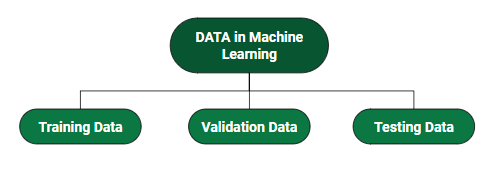

source: https://www.geeksforgeeks.org/ml-introduction-data-machine-learning/

* **Training Data:** The part of data we use to train our model.
* **Validation Data:** The part of data that is used to do a frequent evaluation of the model, fit on the training dataset along with improving involved hyperparameters.
* **Testing Data:** Once our model is completely trained, testing data provides an unbiased evaluation. 

### **How to load data**



*   The ``torchvision`` package consists of popular datasets, model architectures, and common image transformations for computer vision. 
*   For datasets: ``torchvision.datasets``

### **Example to load a built-in dataset using torchvision.datasets**

FashionMNIST: Collection of fashion images (60,000 28x28 grayscale for training and 10,000 for testing)

Here is an example of how to load the Fashion-MNIST dataset from TorchVision. Fashion-MNIST is a dataset of Zalando’s article images consisting of 60,000 training examples and 10,000 test examples. Each example comprises a 28×28 grayscale image and an associated label from one of 10 classes.

We load the FashionMNIST Dataset with the following parameters:

 - ``root`` is the path where the train/test data is stored,
 - ``train`` specifies training or test dataset,
 - ``download=True`` downloads the data from the internet if it's not available at ``root``.
 - ``transform`` and ``target_transform`` specify the feature and label transformations

In [1]:
# import the modules 
from torchvision import datasets
# from torchvision.transforms import ToTensor

# load the data 
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    # transform=ToTensor()
)

# check data 
print('The number of sample is : ', len(training_data))

X= training_data.data
y = training_data.targets

print('The size of each sample is : ', X.shape[1],' X ', X.shape[2])

print('The number of sample is : ', y.shape[0])

# check labels
print('The number of classes is :',len(training_data.classes))
print('The classes are :', training_data.classes)


100%|██████████| 26421880/26421880 [00:01<00:00, 17784127.13it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 301915.91it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5621099.99it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 4987820.97it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw

The number of sample is :  60000
The size of each sample is :  28  X  28
The number of sample is :  60000
The number of classes is : 10
The classes are : ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


### **Visualize data:**

We can index ``Datasets`` manually like a list: ``training_data[index]``.

{'T-shirt/top': 0, 'Trouser': 1, 'Pullover': 2, 'Dress': 3, 'Coat': 4, 'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'Bag': 8, 'Ankle boot': 9}
{0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}


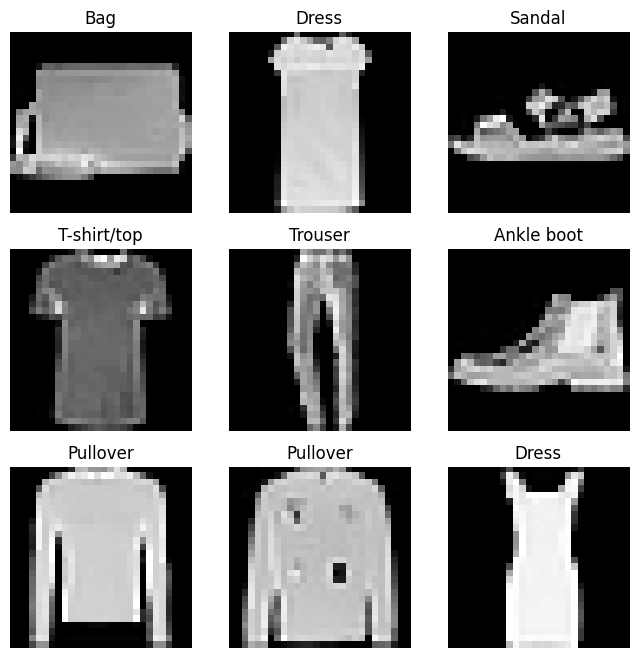

In [ ]:
# import the modules 
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

# load the data
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

labels_map = training_data.class_to_idx
print(labels_map)
labels_map = dict([(value, key) for key, value in labels_map.items()])
print(labels_map)

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

A number of built-in datasets available in torchvision.dataset modules.


* https://pytorch.org/vision/main/datasets.html

### **Creating custom dataset**

A custom Dataset class must implement three functions: `__init__`, `__len__`, and `__getitem__`.
Take a look at this implementation; the images are stored
in a directory ``img_dir``, and their labels are stored separately in a CSV file ``annotations_file``

The labels.csv file looks like: ::

    tshirt1.jpg, 0
    tshirt2.jpg, 0
    ......
    ankleboot999.jpg, 9

In [ ]:
import os
import pandas as pd
from torchvision.io import read_image
from torch.utils.data import Dataset

class CustomImageDataset(Dataset):
    ## initialization function of the class
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    ## upperbound for index
    def __len__(self):
        return len(self.img_labels)

    ## return the samples
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

Three parts of a custom dataset function:


1.   ``__init__``


> The ``__init__`` function is run once when instantiating the Dataset object. We initialize the directory containing the images, the annotations file, and  transforms.


2.   ``__len__``


> The ``__len__`` function returns the number of samples in our dataset.



3.   ``__getitem__``


> The __getitem__ function loads and returns a sample from the dataset at the given index ``idx``.
Based on the index, it identifies the image's location on disk, converts that to a tensor using ``read_image``, retrieves the
corresponding label from the csv data in ``self.img_labels``, calls the transform functions on them (if applicable), and returns the
tensor image and corresponding label in a tuple.




### **Dataloader (``torch.utils.data.DataLoader``)** 

* Dataset stores the samples and their corresponding labels, and DataLoader wraps an iterable around the Dataset to enable easy access to the samples.
*   The ``Dataset`` retrieves dataset’s features and labels one sample at a time.

*   The ``dataloader`` features and labels in **minibatches**. 

*   Four important arguemets --- **dataset**, **batch_size**, **shuffle** and **num_workers** 


https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader


**Preparing data for training and testing with DataLoaders**

In [ ]:
# import the modules 
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

# load the data
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=False)

**Visualize data from dataloader**

We have loaded that dataset into the ``DataLoader`` and can iterate through the dataset as needed.
Each iteration below returns a batch of ``train_features`` and ``train_labels`` (containing ``batch_size=64`` features and labels respectively).
Because we specified ``shuffle=True``, after we iterate over all batches the data is shuffled.

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


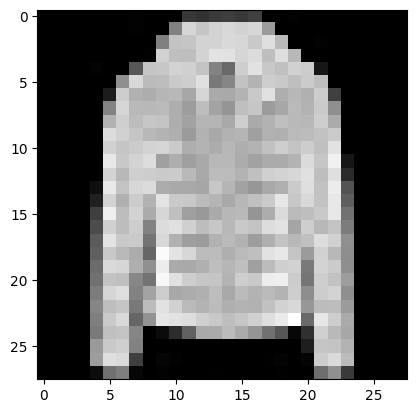

Label: 4 or Coat


In [ ]:
# Display image and label.
labels_map = training_data.class_to_idx # get the label dictionary
labels_map = dict([(value, key) for key, value in labels_map.items()]) # swap key value of the dictionary

train_features, train_labels = next(iter(train_dataloader)) # get features
print(f"Feature batch shape: {train_features.size()}")  # print shape of minibatch features
print(f"Labels batch shape: {train_labels.size()}") # print shape of minibatch labels
img = train_features[0].squeeze()  # get the first sample
label = train_labels[0] # get corresponding label

# plot the image
plt.imshow(img, cmap="gray") 
plt.show()
print(f"Label: {label} or {labels_map[label.item()]}")

**Visualize data in batches**

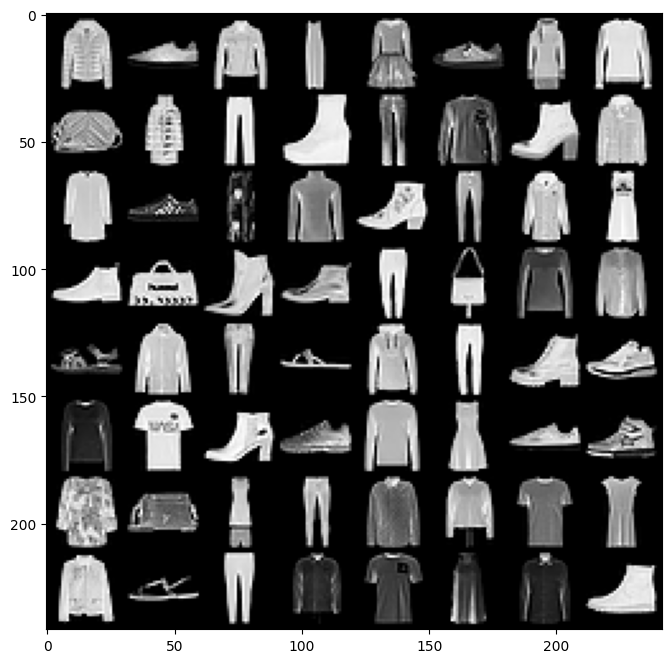

In [ ]:
import numpy as np
import torchvision

def imshow(img):
    img = img 
    npimg = img.numpy()
    # print(npimg.shape)
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# show images
figure = plt.figure(figsize=(8, 8))
imshow(torchvision.utils.make_grid(train_features))

Reference for ``make_grid``: https://pytorch.org/vision/stable/generated/torchvision.utils.make_grid.html

**Visualize data in iterative batches**

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


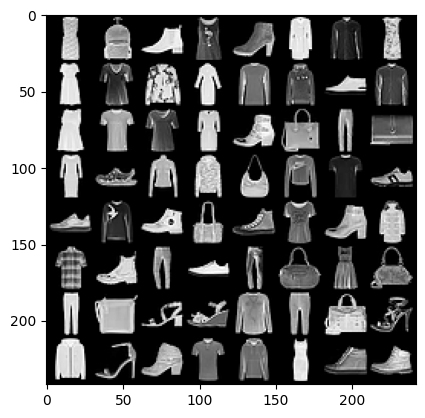

Label: 4
Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


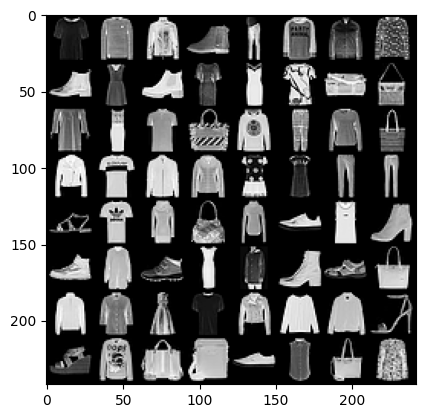

Label: 4
Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


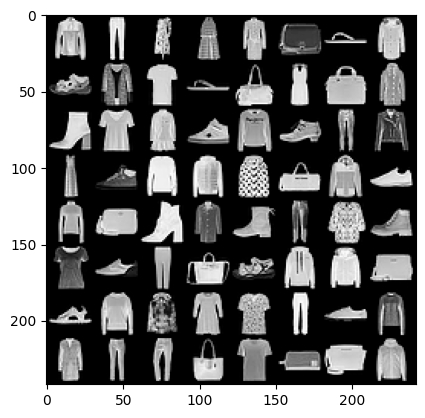

Label: 4
Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


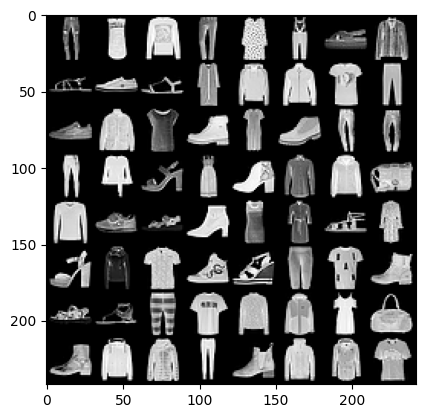

Label: 4
Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


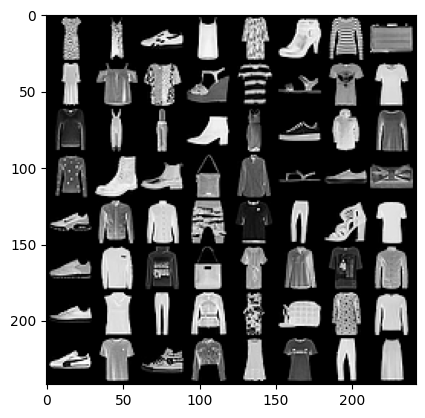

Label: 4
Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


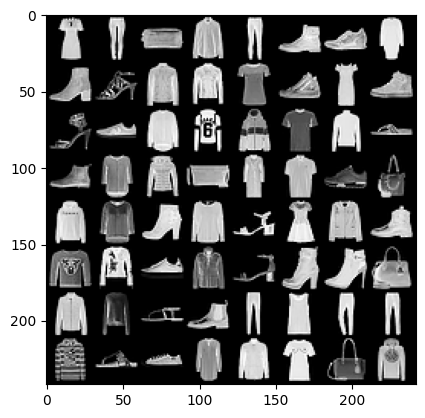

Label: 4
Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


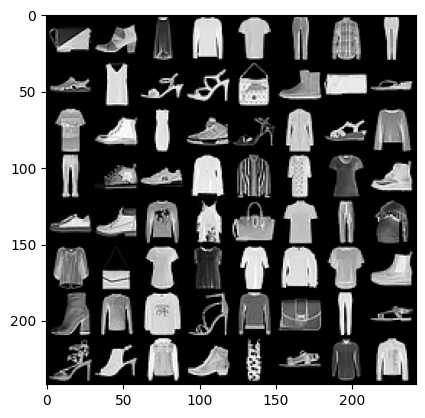

Label: 4


In [ ]:
from dataclasses import dataclass

for i, data in enumerate(train_dataloader, 0):

    train_features, train_labels = data

    print(f"Feature batch shape: {train_features.size()}")
    print(f"Labels batch shape: {train_labels.size()}")
    
    # img = train_features[0].squeeze()
    # label = train_labels[0]
    # plt.imshow(img, cmap="gray")
    # plt.show()
    imshow(torchvision.utils.make_grid(train_features))
    print(f"Label: {label}")
    if i>5:
      break

### <font color = blue> **MNIST** </font> 


*   The MNIST dataset is an acronym that stands for the Modified National Institute of Standards and Technology dataset. It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.




100%|██████████| 9912422/9912422 [00:00<00:00, 96162163.16it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 99618169.26it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 25522719.85it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 5376948.57it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

Feature batch shape: torch.Size([8, 1, 28, 28])
Labels batch shape: torch.Size([8])


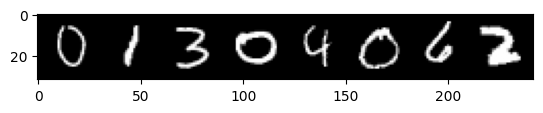

Label: tensor([0, 1, 3, 0, 4, 0, 6, 2])


In [ ]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from dataclasses import dataclass

# load the data
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

# dataloader
train_dataloader = DataLoader(training_data, batch_size=8, shuffle=True)

# show function
def imshow(img):
    img = img 
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# for i, data in enumerate(train_dataloader, 0):

train_features, train_labels = next(iter(train_dataloader))

print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

# img = train_features[0].squeeze()
label = train_labels

imshow(torchvision.utils.make_grid(train_features))
print(f"Label: {train_labels}")


## **Other popular datasets:**


1.   ImageNet
2.   CIFAR10, CIFAR100



## <font color = blue> **Transform** </font> 

Data does not always come in its final processed form that is required for training machine learning algorithms. We use transforms to perform some manipulation of the data and make it suitable for training.


*   <font color = green> **ToTensor** </font> : ToTensor converts a PIL image or NumPy ndarray into a FloatTensor. and scales the image’s pixel intensity values in the range [0.,1.]



In [3]:
import torchvision.transforms as transforms
import numpy as np

# define transform
T = transforms.ToTensor()

# input
# X = np.random.randint(255,size=(8,8),dtype = np.uint8)
X = 5*np.random.random((8,8))

# apply transform
X_tensor = T(X)

# analyse result
print(type(X),type(X_tensor))
print(X)
print(X_tensor)


<class 'numpy.ndarray'> <class 'torch.Tensor'>
[[0.12356525 4.38352056 1.2792768  0.28464192 0.98940083 1.50197099
  1.6087232  4.6952157 ]
 [0.40222217 3.19394353 4.99353539 1.69335156 4.22069899 4.20494157
  0.25616372 2.04392329]
 [0.9197214  3.24952769 3.51361874 4.66641227 1.22182307 2.00118765
  0.08784354 0.14761886]
 [2.10075442 1.78647816 1.53707637 4.22513852 1.68470183 0.88703374
  3.54950731 1.94688799]
 [4.08220121 2.23891156 1.31390433 0.70895396 3.5996676  4.42657094
  3.67378538 2.53125372]
 [3.30558679 1.7242395  2.49804984 4.57984984 0.99845831 1.63185698
  3.46631392 3.58573274]
 [2.64597243 0.07952696 0.69837691 2.41971889 4.09275875 4.51894481
  4.21820143 0.3235989 ]
 [0.1962336  1.85198582 1.34498884 4.16272371 3.05333486 4.93682264
  4.18884999 0.62619858]]
tensor([[[0.1236, 4.3835, 1.2793, 0.2846, 0.9894, 1.5020, 1.6087, 4.6952],
         [0.4022, 3.1939, 4.9935, 1.6934, 4.2207, 4.2049, 0.2562, 2.0439],
         [0.9197, 3.2495, 3.5136, 4.6664, 1.2218, 2.0012, 


*   <font color = green> **Lambda Transform** </font> : Lambda transforms apply any user-defined lambda function



In [4]:
# integer to one-hot encoded tensor 
import torch
from torchvision.transforms import Lambda

# define transform
T = Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))

# input
X = 5

# apply transform
X_tensor = T(X)

# analyse result
print(X)
print(X_tensor)



5
tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])


To understad lambda fuction:

In [ ]:
x = lambda a, b : a + b
print(x(5, 6))


11


In [ ]:
torch.zeros(5, dtype=torch.float).scatter_(dim=0, index=torch.tensor(3), value=1)

tensor([0., 0., 0., 1., 0.])

All TorchVision datasets have two parameters -transform to modify the features and target_transform to modify the labels - that accept callables containing the transformation logic. 

In [ ]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)


print(type(ds[0][0]))
print(ds[100][1])


<class 'torch.Tensor'>
tensor([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])


In [5]:
# mount google drive
from google.colab import drive
drive.mount('/gdrive6')


Mounted at /gdrive6


In [ ]:
# unmount google drive
# from google.colab import drive
# drive.flush_and_unmount()

In [6]:
# go to the folder
%cd '/gdrive6/MyDrive/WSDL2023'


/gdrive6/MyDrive/WSDL2023


*   <font color = green> **Resize** </font> : Resize the input image to the given size.

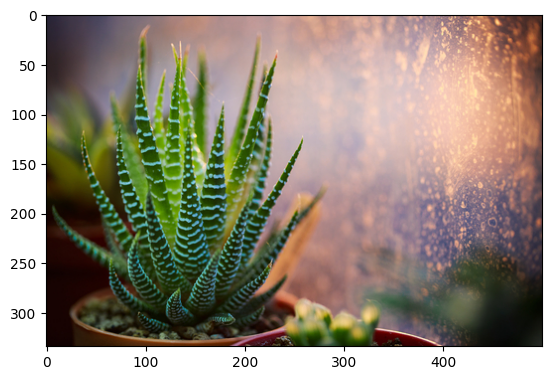

Size of the Original image: (500, 334)


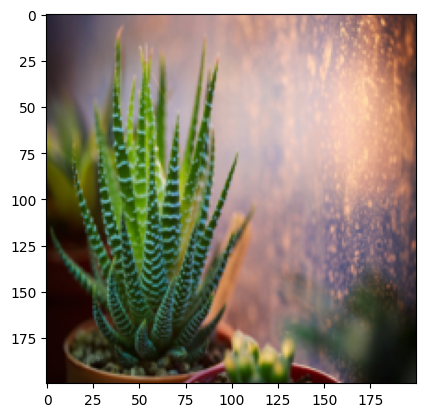

Size after resize: (200, 200)


In [7]:
# import the required libraries
import torch
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt

# read the input image
img = Image.open('plants.jpg')
plt.imshow(img)
plt.show()
# compute the size(width, height) of image
size = img.size
print("Size of the Original image:", size)

# define transformt o resize the image with given size
transform = T.Resize(size = (200,200))

# apply the transform on the input image
img = transform(img)
plt.imshow(img)
plt.show()
print("Size after resize:", img.size)


*   <font color = green> **CnterCrop** </font> : Crops the given image at the center. 

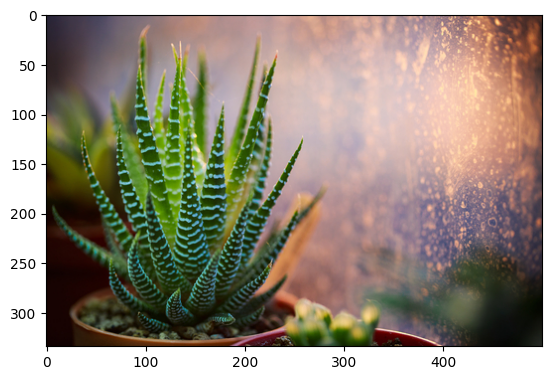

Size after resize: (112, 224)


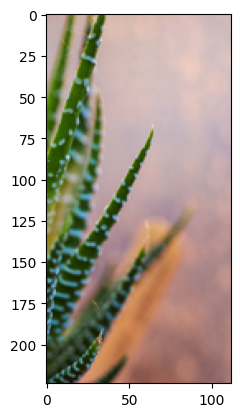

In [8]:
# import the required libraries
import torch
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt

# read the input image
img = Image.open('plants.jpg')
plt.imshow(img)
plt.show()

# define transform  
transform = T.CenterCrop((224,112))


# apply the transform on the input image
img = transform(img)
print("Size after resize:", img.size)
plt.imshow(img)
plt.show()

*   <font color = green> **Pad** </font> : Pad the given image on all sides. 

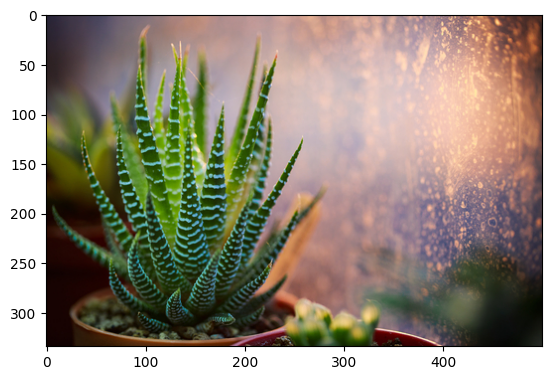

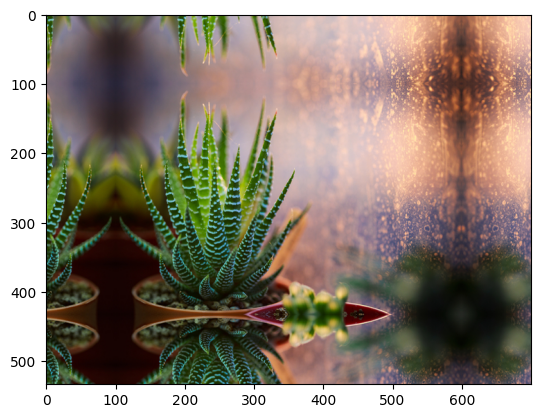

In [12]:
# import the required libraries
import torch
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt

# read the input image
img = Image.open('plants.jpg')
plt.imshow(img)
plt.show()

# define transform  
transform = T.Pad(padding= 100, fill = 255, padding_mode = 'reflect') ## padding_mode = 'constant', 'edge','reflect','symmetric'


# apply the transform on the input image
img = transform(img)
plt.imshow(img)
plt.show()

*   <font color = green> **FiveCrop** </font> : crops the given image into four corners and the central crop. 

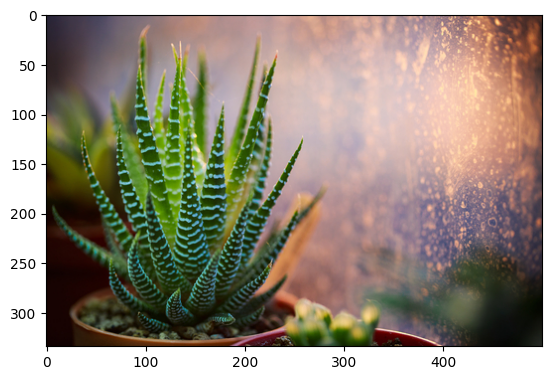

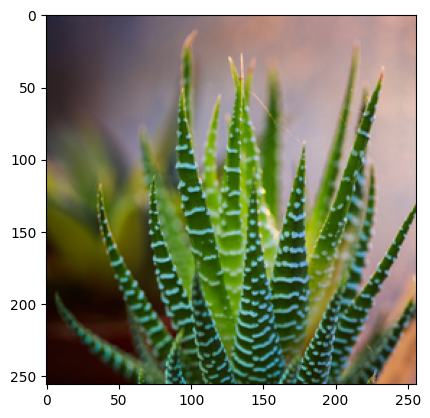

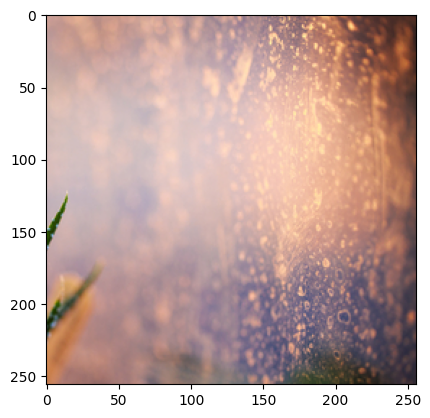

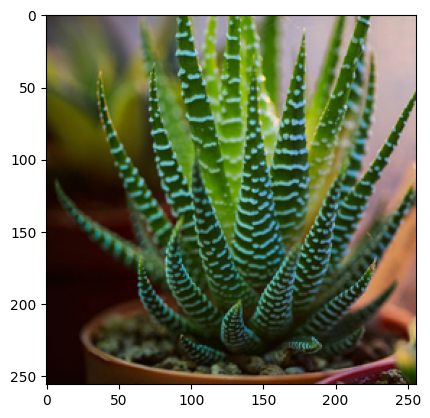

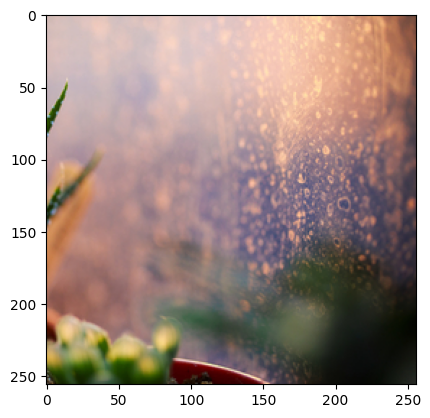

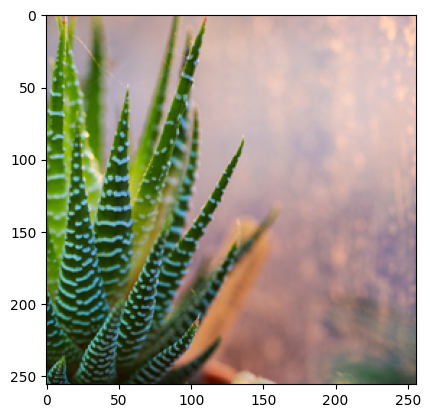

In [ ]:
# import the required libraries
import torch
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt

# read the input image
img = Image.open('plants.jpg')
plt.imshow(img)
plt.show()

# define transform  
transform = T.FiveCrop(size = (256,256))


# apply the transform on the input image
img = transform(img)
for i in range(0,5):
  plt.imshow(img[i])
  plt.show()

*   <font color = green> **GrayScale** </font> : converts into grayscale image 

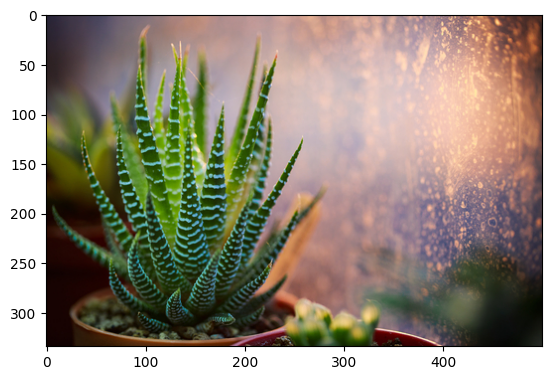

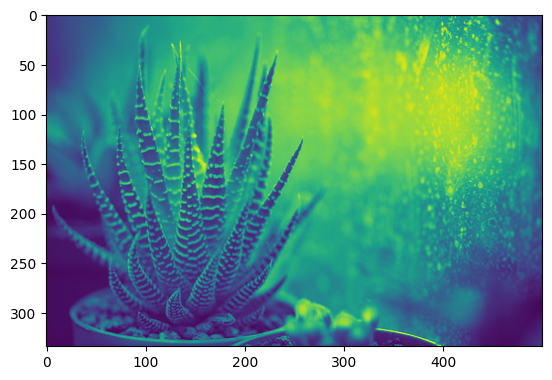

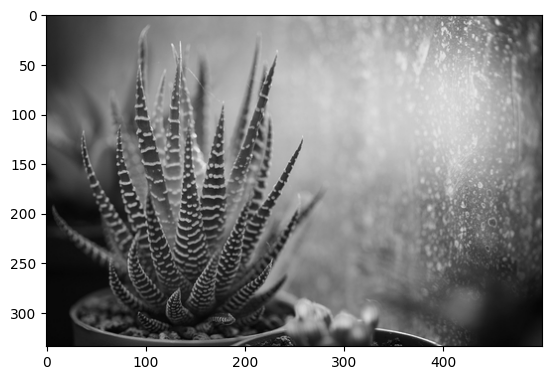

In [ ]:
# import the required libraries
import torch
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# read the input image
img = Image.open('plants.jpg')
plt.imshow(img)
plt.show()

# define transform  
transform = T.Grayscale()

# apply the transform on the input image
img = transform(img)
plt.imshow(img)
plt.show()

plt.imshow(np.stack((np.array(img),np.array(img),np.array(img)),axis =-1))
plt.show()

**Random transforms:**

The same transfomer instance will produce different result each time it transforms a given image.

*   <font color = green> **GaussianBlur** </font> : Performs Gaussian blurring on the image by given kernel 

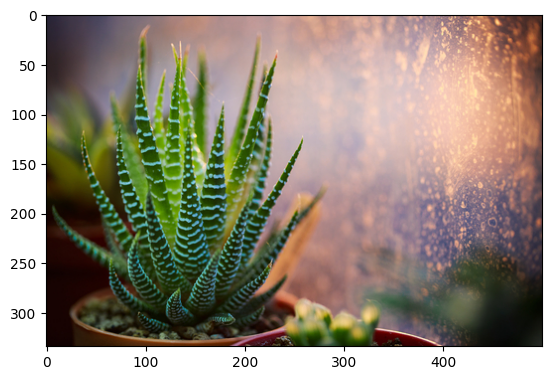

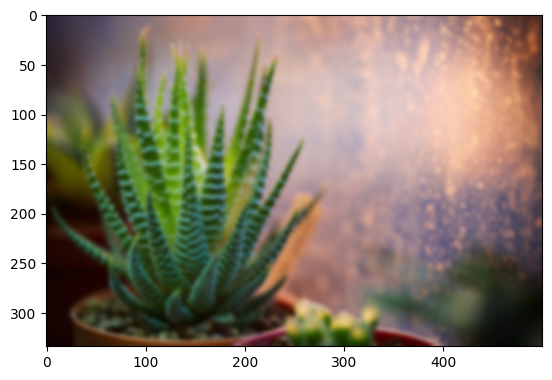

In [ ]:
# import the required libraries
import torch
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# read the input image
img = Image.open('plants.jpg')
plt.imshow(img)
plt.show()

# define transform  
transform = T.GaussianBlur(kernel_size=(15, 9), sigma=(0.1, 5))

# apply the transform on the input image
img = transform(img)
plt.imshow(img)
plt.show()


*   <font color = green> **RandomRotation** </font> : Rotate the image by angle. 

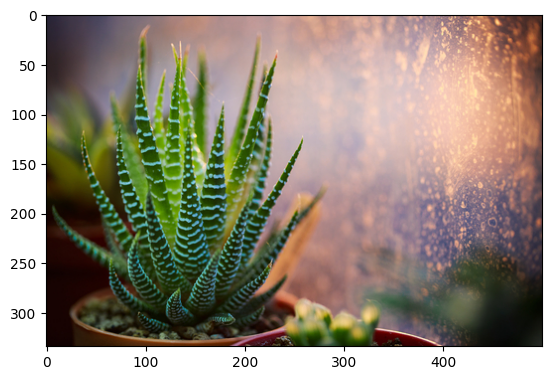

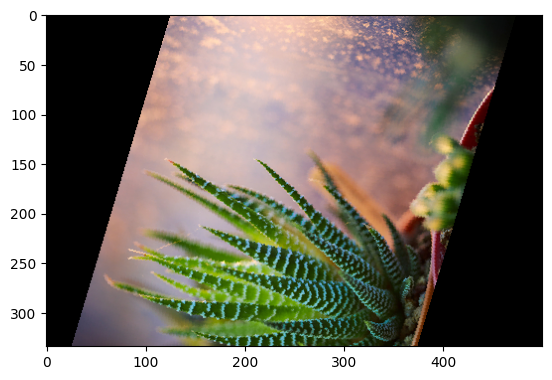

In [ ]:
# import the required libraries
import torch
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# read the input image
img = Image.open('plants.jpg')
plt.imshow(img)
plt.show()

# define transform  
transform = T.RandomRotation(degrees=(0, 180))


# apply the transform on the input image
img = transform(img)
plt.imshow(img)
plt.show()

**Randomly-applied transforms:**

The transforms are randomly-applied given a probability p.

*   <font color = green> **RandomHorizontalFlip** </font> : Horizontally flip the given image randomly with a given probability. 

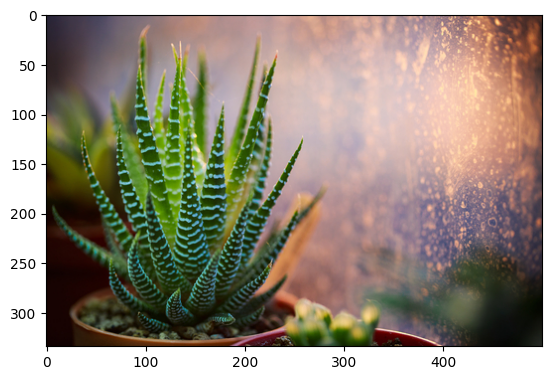

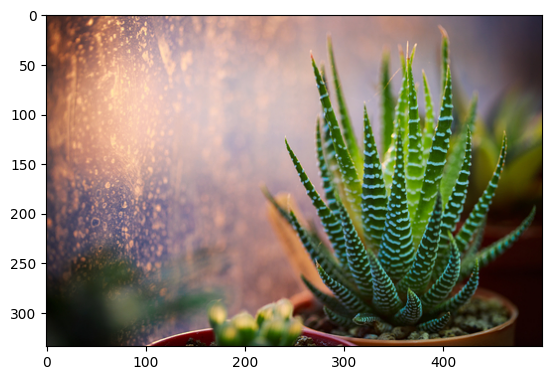

In [ ]:
# import the required libraries
import torch
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# read the input image
img = Image.open('plants.jpg')
plt.imshow(img)
plt.show()

# define transform  
transform = T.RandomHorizontalFlip(p=0.5) # similarly RandomVerticalFlip

# apply the transform on the input image
img = transform(img)
plt.imshow(img)
plt.show()

**Compositions of transforms**

tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])
tensor([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])
tensor([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])
tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])


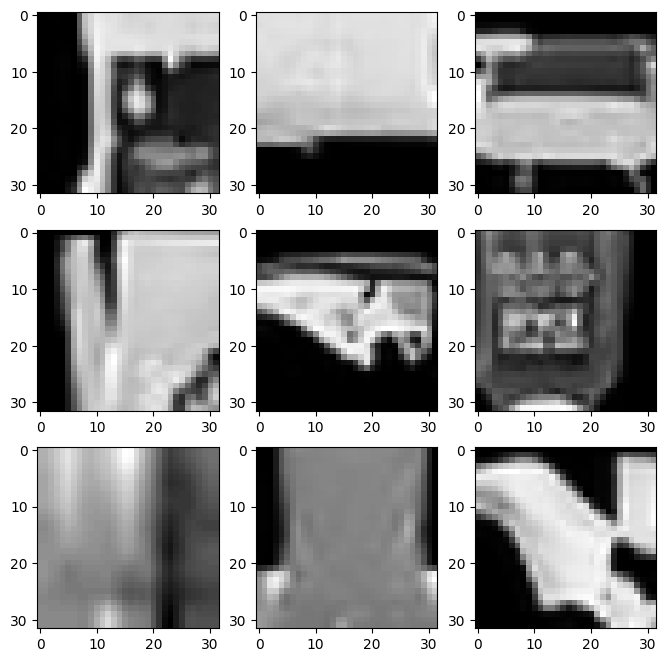

In [15]:
import torch
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
from torchvision.transforms import ToTensor, Lambda

T = transforms.Compose([
        transforms.RandomResizedCrop((32)),
        # transforms.CenterCrop(25),
        # transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(.9),
        # transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.3),
        # transforms.Grayscale(),
        transforms.ToTensor(),
        # transforms.RandomInvert(.5),
        # transforms.Normalize(mean=[0.485],
        #                      std=[0.229])
    ])


ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=T,
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(ds), size=(1,)).item()
    img, label = ds[sample_idx]
    print(label)
    figure.add_subplot(rows, cols, i)
    # plt.title(labels_map[label])
    # plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

https://pytorch.org/vision/main/auto_examples/plot_transforms.html#sphx-glr-auto-examples-plot-transforms-py

#**Classification Metrics:**


In [ ]:

# Importing necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Loading the breast cancer data set
breast_cancer_data = load_breast_cancer()

# Creating independent and dependent variables
X = breast_cancer_data.data
y = breast_cancer_data.target

# Splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Train Data: {X_test.shape}, {y_test.shape}")

# Training a binary classifier using Random Forest Algorithm with default hyperparameters
classifier = RandomForestClassifier(random_state=18)
classifier.fit(X_train, y_train)

# Here X_test, y_test are the test data points
predictions = classifier.predict(X_test)

Train Data: (455, 30), (455,)
Train Data: (114, 30), (114,)


# 1.   **Accuracy**


    


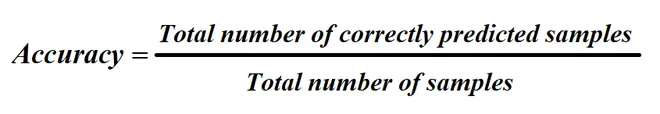

In [ ]:
# Importing all necessary libraries
from sklearn.metrics import accuracy_score
# Calculating the accuracy of classifier
print(f"Accuracy of the classifier is: {accuracy_score(y_test, predictions)}")

Accuracy of the classifier is: 0.9473684210526315



# 2.   **Confusion Matrix**


    

1.   True Positives (TP): These are the cases where the predicted “Yes” actually belonged to class “Yes”.
2.   True Negatives (TN): These are the cases where the predicted “No” actually belonged to class “No”.
3.   False Positives (FP): These are the cases where the predicted “Yes” actually belonged to class “No”.
4.   False Negatives (FN): These are the cases where the predicted “No” actually belonged to class “Yes”.

Accuracy = (TP + TN) / (TP + FP + TN + FN)

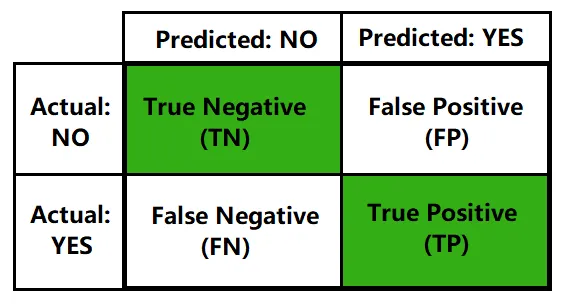

[[39  2]
 [ 4 69]]


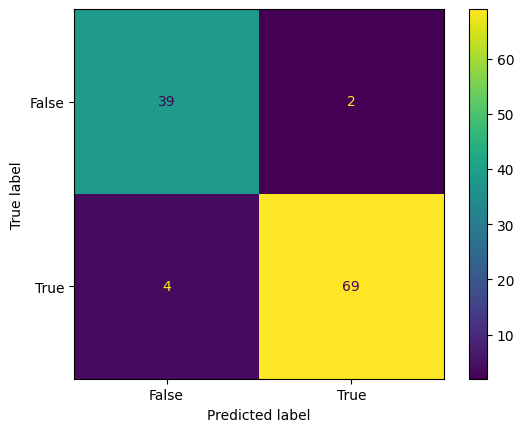

In [ ]:
# importing all necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# confusion_matrix funnction a matrix containing the summary of predictions

CM = metrics.confusion_matrix(y_test, predictions)
print(confusion_matrix(y_test, predictions))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = CM, display_labels = [False, True])

cm_display.plot()
plt.show()

# 3. **Precision (or Positive Predictive Value)**

Precision is the ratio of true positives (TP) by the sum of true positives (TP) and false positives (FP).

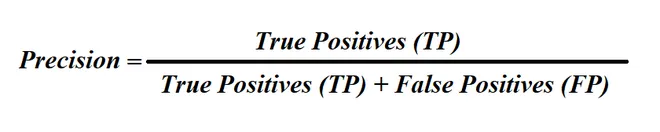

In [16]:
# Importing all necessary libraries
from sklearn.metrics import precision_score

# Calculating the precision score of classifier
print(f"Precision Score of the classifier is: {precision_score(y_test, predictions)}")

NameError: ignored

# 4. **Recall (or Sensitivity or True Positive Rate)**
Recall is the ratio of true positives (TP) by the sum of true positives (TP) and false negatives (FN).

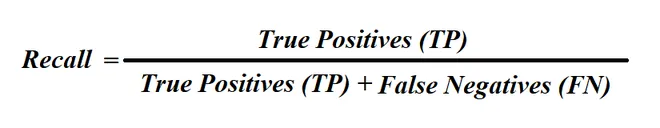

In [ ]:
# Importing all necessary libraries
from sklearn.metrics import recall_score

# Calculating the recall score of classifier
print(f"Recall Score of the classifier is: {recall_score(y_test, predictions)}")

Recall Score of the classifier is: 0.9452054794520548


# 5. **F1 Score**

F1 score should be used when both precision and recall are important for the use case. F1 score is the harmonic mean of precision and recall. It lies between [0,1].

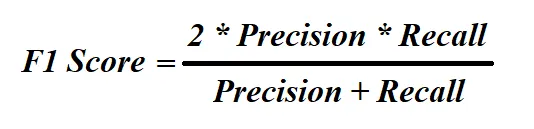

In [ ]:
# Importing all necessary libraries
from sklearn.metrics import f1_score

# Calculating the F1 score of classifier
print(f"F1 Score of the classifier is: {f1_score(y_test, predictions)}")

F1 Score of the classifier is: 0.9583333333333334


# 5. **F$\beta$ Score**


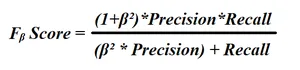

1. If both False Positives (FP) and False Negatives (FN) are important then β = 1
2. If False Positive (FP) is important then β lies between o and 1.
3. If False Negative (FN) is important then β > 1.

In [ ]:
# Importing all necessary libraries
from sklearn.metrics import fbeta_score

# Calculating the F1 score of classifier
print(f"F-beta Score of the classifier is: {fbeta_score(y_test, predictions,beta = 1.5)}")

F-beta Score of the classifier is: 0.9532412327311371


## 6.   **AUC-ROC** 

1. ROC Curve is used to measure the performance for the classification model at different threshold values. 
2. ROC is Receiver Operating Characteristic Curve and AUC is Area Under Curve. 
3. The higher the value of AUC, the better is the performance. 
4. AUC-ROC is mostly used in binary classification problems.
5. True Positive Rate (TPR) on the y-axis and False Positive Rate (FPR) on the x-axis

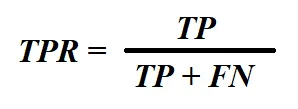

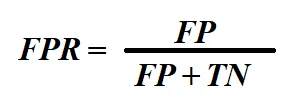

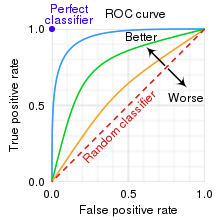

AUC for our classifier is: 0.9769462078182426


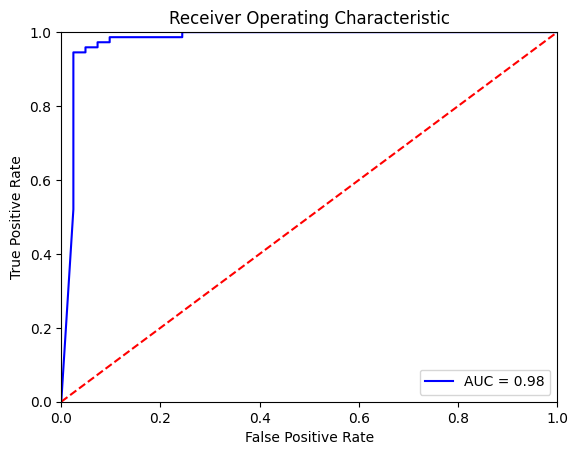

In [ ]:
# Importing all necessary libraries
from sklearn.metrics import roc_curve, auc

class_probabilities = classifier.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Check this: https://towardsdatascience.com/intuition-behind-roc-auc-score-1456439d1f30

#**Training an image classifier using datasets and dataloader**

----------------------------

Steps:

1. Load data 
2. Define network
3. Define loss function, optimizer
4. Train the network with training data
5. Evaluate the network on test data


**1. Load and normalize the CIFAR10 training and test datasets using
   ``torchvision``**


The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes. The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class.

In [17]:
import torch
import torchvision
from torchvision import transforms, datasets

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 16

trainset = datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)


# check data 

print('The number of training sample is : ', len(trainset))
print('The number of test sample is : ', len(testset))
print('The size of each sample is : ', trainset[0][0].shape[1],' X ', trainset[0][0].shape[2])
print('The number of classes is :',len(trainset.classes))
print('The classes are :', trainset.classes)



Files already downloaded and verified
Files already downloaded and verified
The number of training sample is :  50000
The number of test sample is :  10000
The size of each sample is :  32  X  32
The number of classes is : 10
The classes are : ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


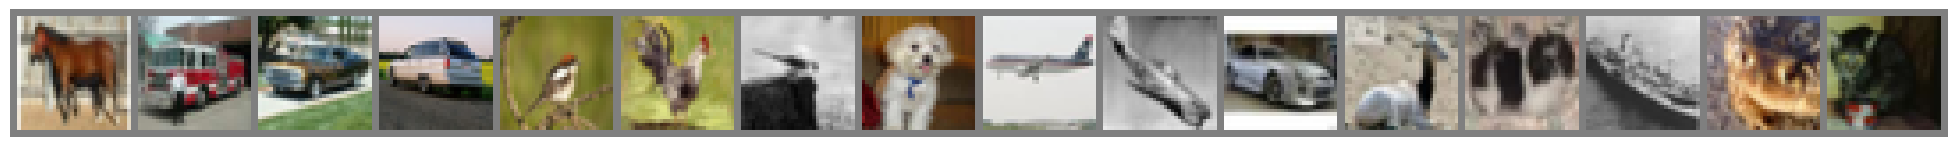

horse      truck      automobile automobile bird       bird       bird       dog        airplane   airplane   automobile deer       dog        ship       frog       cat       


In [18]:
# functions to show an image
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    f = plt.figure(figsize=(25, 6)) 
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images,nrow = 16))
# print labels
classes = trainset.classes
print(' '.join(f'{classes[labels[j]]:10s}' for j in range(batch_size)))

**2. Define a Network**

In [19]:
#check for gpu avialability
if torch.cuda.is_available():
  device = 'cuda'
else:
  device = 'cpu'

print(device)

cpu


In [ ]:
import torch.nn as nn
import torch.nn.functional as F


# class Net(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.conv1 = nn.Conv2d(3, 6, 5)
#         self.pool = nn.MaxPool2d(2, 2)
#         self.conv2 = nn.Conv2d(6, 16, 5)
#         self.fc1 = nn.Linear(16 * 5 * 5, 120)
#         self.fc2 = nn.Linear(120, 84)
#         self.fc3 = nn.Linear(84, 10)

#     def forward(self, x):
#         x = self.pool(F.relu(self.conv1(x)))
#         x = self.pool(F.relu(self.conv2(x)))
#         x = torch.flatten(x, 1) # flatten all dimensions except batch
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = self.fc3(x)
#         return x
import torch.nn as nn
import torch.nn.functional as F
# define NN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        # number of hidden nodes in each layer (512)
        hidden_1 = 512
        hidden_2 = 512
        # linear layer (784 -> hidden_1)
        self.fc1 = nn.Linear(32*32*3, 512)
        # linear layer (n_hidden -> hidden_2)
        self.fc2 = nn.Linear(512,512)
        # linear layer (n_hidden -> 10)
        self.fc3 = nn.Linear(512,10)
        # dropout layer (p=0.2)
        # dropout prevents overfitting of data
        self.droput = nn.Dropout(0.2)
        
    def forward(self,x):
        # flatten image input
        x = x.view(-1,32*32*3)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add dropout layer
        x = self.droput(x)
         # add hidden layer, with relu activation function
        x = F.relu(self.fc2(x))
        # add dropout layer
        x = self.droput(x)
        # add output layer
        x = self.fc3(x)
        return x

net = Net()
net = net.to(device)

**3. Construct a Loss function and optimizer**

*   Loss function: Cross-Entropy loss 
*   Optimizer: SGD 


In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

**4. Train the network on training data**


In [ ]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

# save the model
PATH = 'model.pth'
torch.save(net.state_dict(), PATH)

[1,  2000] loss: 1.877
[2,  2000] loss: 1.569
[3,  2000] loss: 1.457
[4,  2000] loss: 1.396
[5,  2000] loss: 1.332
[6,  2000] loss: 1.277
[7,  2000] loss: 1.232
[8,  2000] loss: 1.193
[9,  2000] loss: 1.144
[10,  2000] loss: 1.118
Finished Training


**4. Evaluate the trained model on test data**


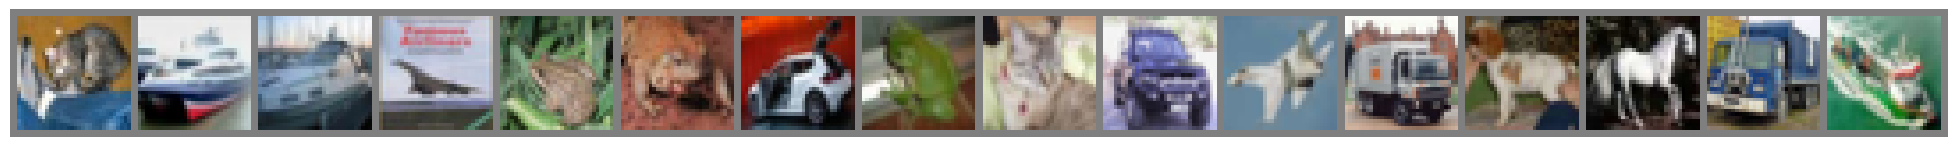

GT:  cat       ship      ship      airplane  frog      frog      automobile frog      cat       automobile airplane  truck     dog       horse     truck     ship     


In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images,nrow= 16))
print('GT: ', ' '.join(f'{classes[labels[j]]:9s}' for j in range(16)))

In [ ]:
net = Net()
net.load_state_dict(torch.load(PATH))
net = net.to(device)
images, labels = images.to(device), labels.to(device)

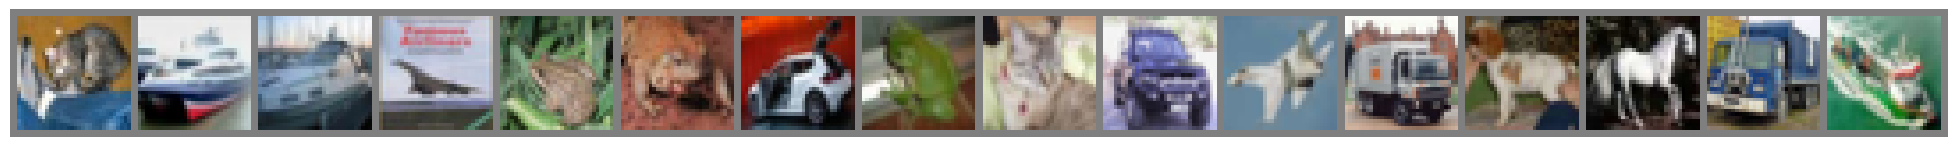

GT:  cat       ship      ship      airplane  frog      frog      automobile frog      cat       automobile airplane  truck     dog       horse     truck     ship     
Pred:  cat       truck     airplane  bird      deer      frog      cat       frog      cat       automobile airplane  truck     automobile horse     automobile ship     


In [ ]:
outputs = net(images)

_, predicted = torch.max(outputs, 1)

imshow(torchvision.utils.make_grid(images.cpu(),nrow= 16))
print('GT: ', ' '.join(f'{classes[labels[j]]:9s}' for j in range(16)))
print('Pred: ', ' '.join(f'{classes[predicted[j]]:9s}'for j in range(16)))

In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 53 %


In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: airplane is 59.9 %
Accuracy for class: automobile is 61.7 %
Accuracy for class: bird  is 45.3 %
Accuracy for class: cat   is 34.0 %
Accuracy for class: deer  is 47.6 %
Accuracy for class: dog   is 39.3 %
Accuracy for class: frog  is 62.2 %
Accuracy for class: horse is 60.7 %
Accuracy for class: ship  is 66.0 %
Accuracy for class: truck is 57.2 %


## K-fold cross validation:
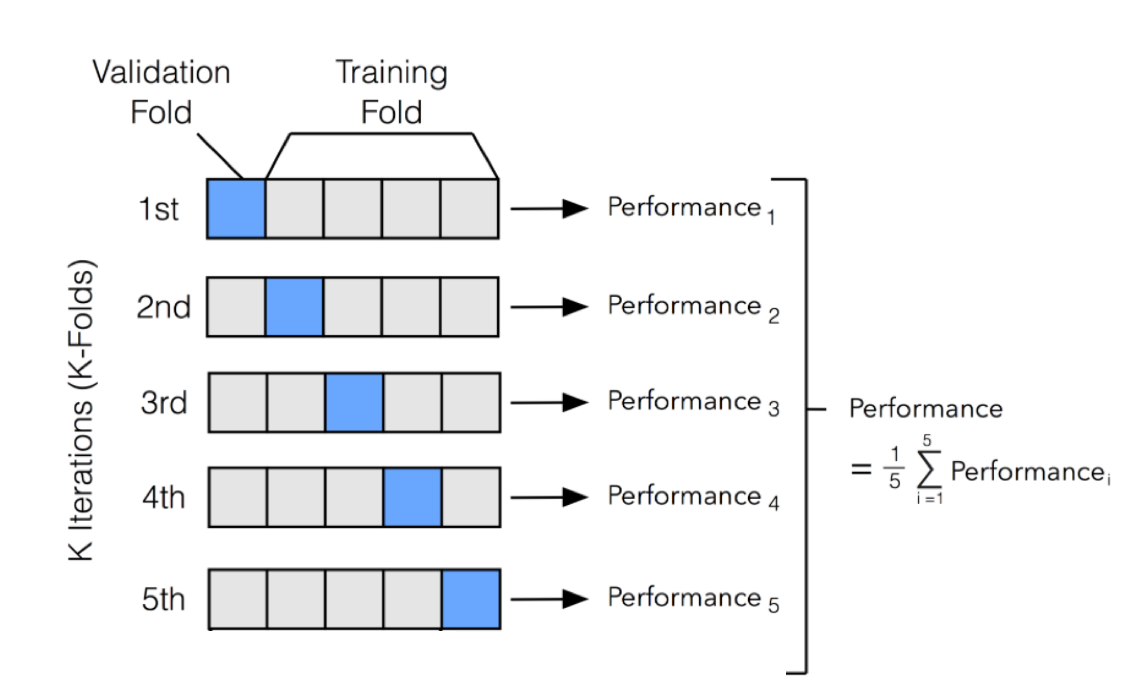

In [ ]:
from sklearn.model_selection import KFold
from torch.utils.data import Dataset, DataLoader,TensorDataset,random_split,SubsetRandomSampler, ConcatDataset
import numpy as np
import torchvision
from torchvision import datasets,transforms
import torchvision.transforms as transforms


train_dataset = torchvision.datasets.MNIST('classifier_data', train=True, download=True)
test_dataset  = torchvision.datasets.MNIST('classifier_data', train=False, download=True)

transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor()
])

train_dataset.transform=transform
test_dataset.transform=transform
dataset = ConcatDataset([train_dataset, test_dataset])

k=10
splits=KFold(n_splits=k,shuffle=True,random_state=42)
batch_size=128

for fold, (train_idx,val_idx) in enumerate(splits.split(np.arange(len(dataset)))):

    print('Fold {}'.format(fold + 1))

    train_sampler = SubsetRandomSampler(train_idx)
    test_sampler = SubsetRandomSampler(val_idx)
    #The SubsetRandomSampler samples elements randomly from a list, without replacements.
    train_loader = DataLoader(dataset, batch_size=batch_size, sampler=train_sampler)
    test_loader = DataLoader(dataset, batch_size=batch_size, sampler=test_sampler)
    

Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
Fold 10
